<a href="https://colab.research.google.com/github/psgrigoletti/margem-liquida-colab/blob/main/investpy_teste_2_curva_de_juros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Curva de Juros

In [ ]:
!pip install investpy

In [43]:
import investpy as inv
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta
import seaborn as sns; sns.set()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (16,8)

Além do desempenho do câmbio, commodities e índices, a **movimentação da curva de juros** é uma das principais variáveis a serem monitoradas pelos investidores, sobretudo no universo de renda fixa. 

Neste material, iremos abordar o que é a curva de juros, sua importância, como ela é traçada e de que maneira sua movimentação impacta os investimentos.

A **curva de juros**, também conhecida como curva a termo ou yield curve, pode ser compreendida como as expectativas dos rendimentos médios de títulos públicos prefixados sem cupom (ou seja, sem pagamentos semestrais), a partir dos **contratos futuros de juros (ou DI)**.

Contratos futuros representam o compromisso de compra ou venda de determinado ativo numa determinada data a determinado preço. Neste caso, os acordos negociados na B3 (bolsa de valores brasileira) são atrelados à **taxa DI**. 

In [25]:
bondsBR = inv.get_bonds_list("brazil")
bondsBR

['Brazil 3M',
 'Brazil 6M',
 'Brazil 9M',
 'Brazil 1Y',
 'Brazil 2Y',
 'Brazil 3Y',
 'Brazil 5Y',
 'Brazil 8Y',
 'Brazil 10Y']

# Últimos dados da curva de juros

In [8]:
bonds_overview = inv.get_bonds_overview("brazil")
bonds_overview

,country,name,last,last_close,high,low,change,change_percentage
0,brazil,Brazil 3M,12.011,11.470,11.470,11.388,+0.541,+4.72%
1,brazil,Brazil 6M,12.806,12.190,12.285,12.190,+0.615,+5.05%
2,brazil,Brazil 9M,13.212,12.725,12.880,12.725,+0.487,+3.83%
3,brazil,Brazil 1Y,13.229,13.035,13.080,13.035,+0.195,+1.49%
4,brazil,Brazil 2Y,12.151,12.665,12.885,12.665,-0.513,-4.05%
5,brazil,Brazil 3Y,12.270,12.196,12.380,12.196,+0.074,+0.61%
6,brazil,Brazil 5Y,11.847,12.115,12.260,11.880,-0.268,-2.21%
7,brazil,Brazil 8Y,11.857,12.220,12.255,11.910,-0.363,-2.97%
8,brazil,Brazil 10Y,11.879,12.165,12.165,11.930,-0.286,-2.35%


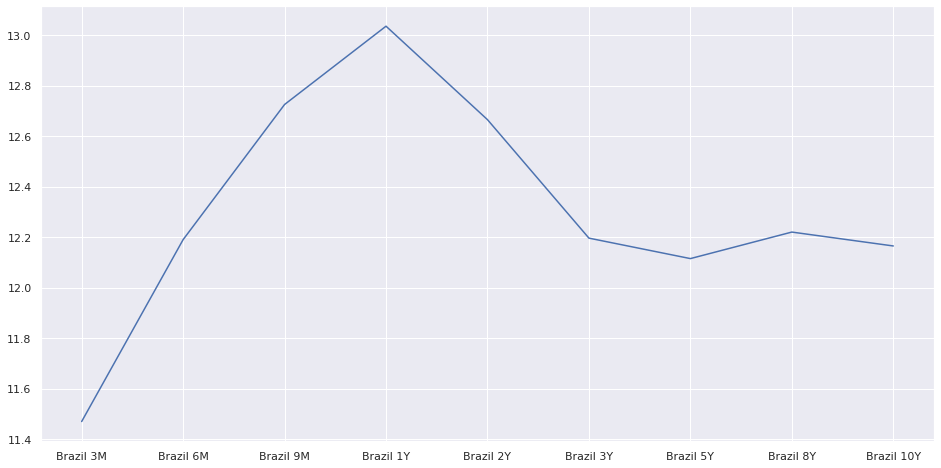

In [26]:
plt.plot(bondsBR, bonds_overview['last_close'])

# Taxa de juros para 1 ano

In [44]:

data_inicio = '01/01/2010'
data_fim = datetime.today().strftime('%d/%m/%Y')
um_ano = inv.get_bond_historical_data("Brazil 1Y", from_date=data_inicio, to_date=data_fim)
um_ano

,Open,High,Low,Close
Date,,,,
2010-01-04,11.040,11.416,11.010,11.360
2010-01-05,11.370,11.400,11.310,11.320
2010-01-06,11.350,11.350,11.270,11.295
2010-01-07,11.275,11.416,11.270,11.416
2010-01-08,11.285,11.416,11.205,11.205
...,...,...,...,...
2022-03-03,12.790,13.010,12.790,13.010
2022-03-04,13.015,13.015,13.010,13.010
2022-03-07,13.100,13.275,13.100,13.275


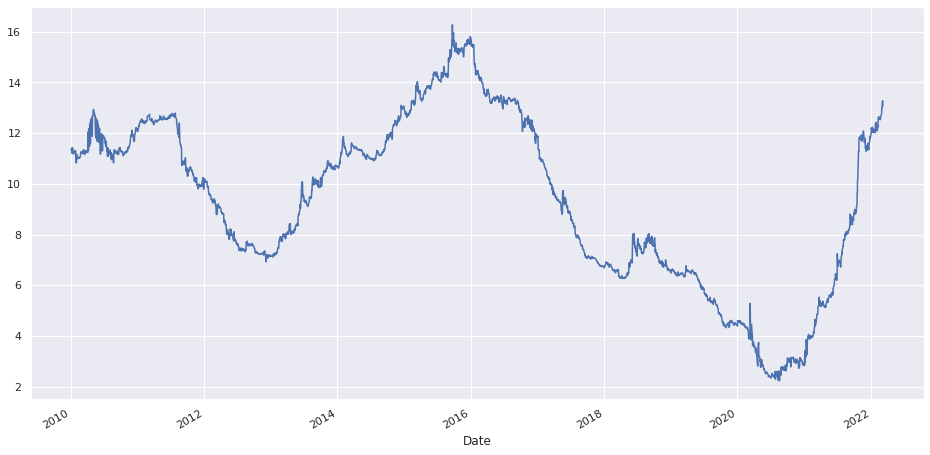

In [45]:
um_ano['Close'].plot()

In [49]:
data_inicio = '01/01/2010'
ontem = datetime.now() - timedelta(1)
data_fim = ontem.strftime('%d/%m/%Y')
data_fim_formato_americano = ontem.strftime('%Y-%m-%d')
bonds = pd.DataFrame()
for prazo in bondsBR:
  bonds[prazo] = inv.get_bond_historical_data(prazo, from_date=data_inicio, to_date=data_fim)['Close']

In [50]:
bonds.index = pd.to_datetime(bonds.index)

In [51]:
bonds

,Brazil 3M,Brazil 6M,Brazil 9M,Brazil 1Y,Brazil 2Y,Brazil 3Y,Brazil 5Y,Brazil 8Y,Brazil 10Y
Date,,,,,,,,,
2010-01-04,8.680,9.170,10.475,11.360,11.910,12.700,12.740,NaN,NaN
2010-01-05,8.670,9.170,10.445,11.320,11.890,12.740,12.740,NaN,NaN
2010-01-06,8.670,9.140,10.330,11.295,11.820,12.750,12.740,NaN,NaN
2010-01-07,8.700,9.140,10.330,11.416,11.264,12.770,12.770,NaN,NaN
2010-01-08,8.650,9.110,10.300,11.205,11.770,12.760,12.760,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2022-03-03,11.268,12.170,12.800,13.010,12.460,11.827,11.525,11.39,11.42
2022-03-04,11.268,12.170,12.800,13.010,12.660,12.070,11.525,11.39,11.42
2022-03-07,11.390,12.365,13.040,13.275,13.050,12.328,12.005,11.83,11.86


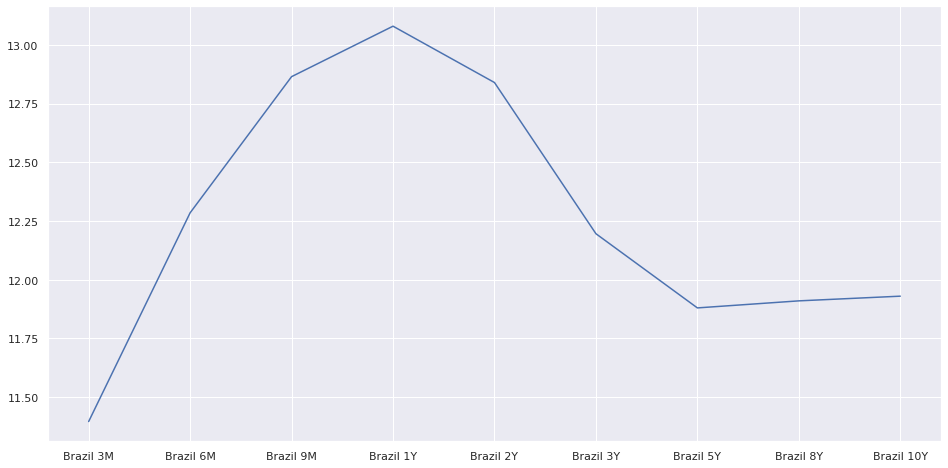

In [52]:
plt.plot(bondsBR, bonds.loc[data_fim_formato_americano].values)

In [53]:
import plotly.graph_objects as go

In [54]:
fig = go.Figure()
for i in bonds.index:
  fig.add_trace(go.Scatter(x=bondsBR, y=bonds.loc[i], mode='lines', name=str(i)))
fig.show()

In [55]:
data_inicio = '01/01/2010'
ontem = datetime.now() - timedelta(1)
data_fim = ontem.strftime('%d/%m/%Y')
data_fim_formato_americano = ontem.strftime('%Y-%m-%d')
bondsMensais = pd.DataFrame()
for prazo in bondsBR:
  bondsMensais[prazo] = inv.get_bond_historical_data(prazo, from_date=data_inicio, to_date=data_fim, interval="Monthly")['Close']


fig = go.Figure()
for i in bondsMensais.index:
  fig.add_trace(go.Scatter(x=bondsBR, y=bondsMensais.loc[i], mode='lines', name=str(i), visible=False))

fig.data[0].visible = True
steps = []

for i in range(len(fig.data)):
  step = dict(
      method='restyle',
      args=['visible', [False] * len(fig.data)],
      label=fig.data[i]['name'][:7]
  )
  step['args'][1][i]=True
  steps.append(step)

sliders = [dict(
    active=0,
    currentvalue={'prefix': 'Mês: '},
    pad={'t':50},
    steps=steps
)]

fig.update_layout(sliders=sliders, 
                  yaxis=dict(range=[3,14.5]))
fig.show()

In [56]:
def consulta_bc(codigo_bcb):
  url = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json'.format(codigo_bcb)
  df = pd.read_json(url)
  df['data'] = pd.to_datetime(df['data'], dayfirst=True)
  df.set_index('data', inplace=True)
  return df

In [61]:
selic_meta = consulta_bc(432)
s2015 = selic_meta[selic_meta.index.year >= 2015]
s2015


,valor
data,
2015-01-01,11.75
2015-01-02,11.75
2015-01-03,11.75
2015-01-04,11.75
2015-01-05,11.75
...,...
2022-03-12,10.75
2022-03-13,10.75
2022-03-14,10.75


In [97]:
b2015 = bonds[bonds.index.year >= 2015]
# dayofweek = b2015.index.dayofweek
# semanal = b2015.iloc[(dayofweek == 0)]
# semanal

In [99]:
fig = go.Figure()

for i in bondsBR:
  fig.add_trace(go.Scatter(x=b2015.index, y=b2015[i], mode='lines', name=str(i)))

fig.show()

In [154]:
# b2015t = b2015.tail()
dayofweek = b2015.index.dayofweek
semanal = b2015.iloc[(dayofweek == 0)]
temp = semanal.tail(10)
temp.drop(['Brazil 8Y', 'Brazil 10Y'], inplace=True, axis=1)
temp = temp.T
temp

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Date,2021-12-27,2022-01-03,2022-01-10,2022-01-17,2022-01-24,2022-01-31,2022-02-07,2022-02-14,2022-02-21,2022-03-07
Brazil 3M,9.257,10.362,10.470,10.572,10.718,10.928,11.018,11.092,11.146,11.390
Brazil 6M,10.255,11.360,11.520,11.585,11.515,11.875,11.735,11.985,11.985,12.365
Brazil 9M,11.230,11.850,12.045,12.020,11.925,12.305,12.040,12.495,12.415,13.040
Brazil 1Y,11.740,11.970,12.230,12.160,12.020,12.420,12.105,12.650,12.545,13.275
Brazil 2Y,11.695,11.350,12.020,11.945,11.645,12.000,11.605,12.250,12.190,13.050
Brazil 3Y,11.170,10.946,11.623,11.520,11.188,11.360,11.048,11.569,11.422,12.328
Brazil 5Y,10.735,10.920,11.250,11.460,11.305,11.025,10.745,11.180,11.125,12.005


# Curva de juros das últimas 5 semanas

In [158]:
fig = go.Figure()
fig.update_layout(title_text="Curva de Juros nas últimas 10 semanas",
                  title_font_size=30)
for i in temp:
  fig.add_trace(go.Scatter(x=temp.index, y=temp[i], mode='lines', name="Data: " + i.strftime('%d/%m/%Y')))
fig.show()